In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import kneighbors_graph

In [2]:
np.random.seed(0)
n_samples=1500
no_structure= np.random.randn(n_samples,2), None
blobs= make_blobs(n_samples=n_samples, random_state=8, centers=4)
noisy_circles= make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons= make_moons(n_samples=n_samples, noise=.05)

colors = np.array([x for x in 'cmykbgrcmykbgrcmykbgrcmykbgr'])
colors = np.hstack([colors] * 20)

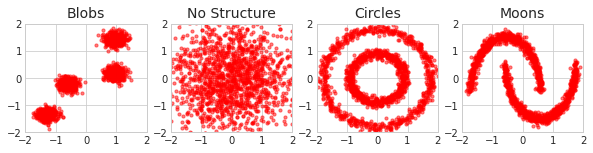

In [4]:
plt.figure(figsize=(10, 2))

plot_num=1
name= ['Blobs','No Structure','Circles','Moons']
for i_dataset, dataset in enumerate([blobs,no_structure, noisy_circles, noisy_moons]):
    [X,y]= dataset
    X = StandardScaler().fit_transform(X)
    
    plt.subplot(1,4,plot_num)
    plt.title(name[plot_num-1],size=14)
    plt.scatter(X[:, 0], X[:, 1], color='r', marker='o',s=10, alpha=.5)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    #plt.xticks(())
    #plt.yticks(())

    plot_num+=1
        
plt.show();

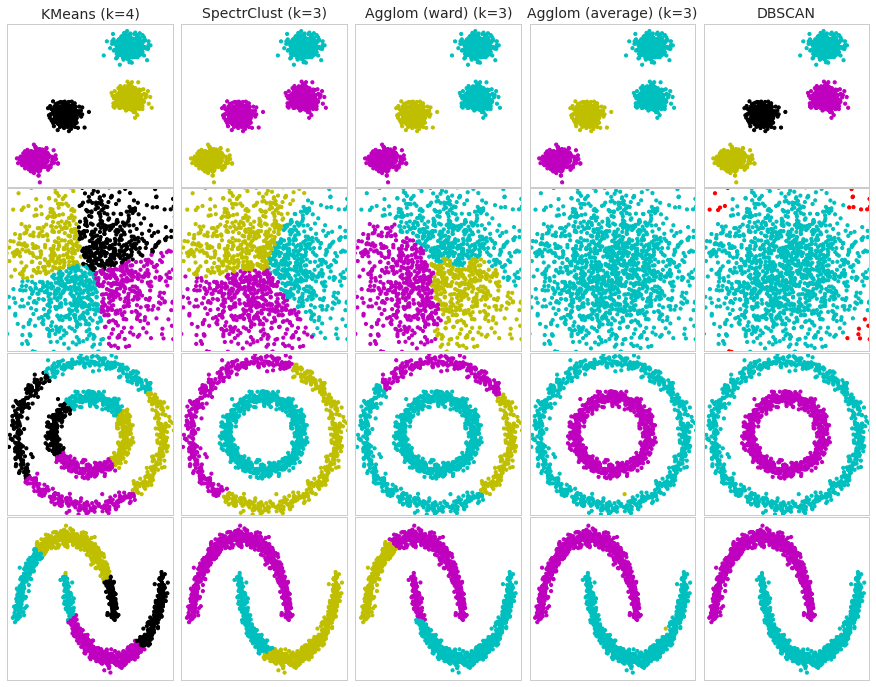

In [5]:
plt.figure(figsize=(12, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1

for i_dataset, dataset in enumerate([blobs,no_structure, noisy_circles, noisy_moons]):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    connectivity = kneighbors_graph(X, n_neighbors=10)
    connectivity = 0.5 * (connectivity + connectivity.T)

    distances = euclidean_distances(X)

    means = KMeans(n_clusters=4)
    spectral = SpectralClustering(n_clusters=3, eigen_solver='arpack',affinity="nearest_neighbors")
    average_linkage = AgglomerativeClustering(linkage="average",affinity="cityblock", n_clusters=3,
                            connectivity=connectivity)
    ward = AgglomerativeClustering(n_clusters=3,linkage='ward', connectivity=connectivity)
    dbscan= DBSCAN(eps=0.3, min_samples=10)

    for name, algorithm in [('KMeans (k=4)', means),('SpectrClust (k=3)', spectral),
                            ('Agglom (ward) (k=3)', ward),
                            ('Agglom (average) (k=3)', average_linkage),
                            ('DBSCAN', dbscan)]:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(4, 5, plot_num)
        if i_dataset == 0:
            plt.title(name, size=14)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
            
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

        
        
plt.show();